## **1. Importing libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

## **2. Importing data**

In [3]:
file_path = './data/ecommerce_customer_behavior_dataset_v2.csv'

data_sales = pd.read_csv(file_path)
data_sales.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


## **3. Exploratory Data Analysis**

### **3.1. Understading the Dataset**

In [4]:
data_sales.shape

(17049, 18)

In [5]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  17049 non-null  object 
 1   Customer_ID               17049 non-null  object 
 2   Date                      17049 non-null  object 
 3   Age                       17049 non-null  int64  
 4   Gender                    17049 non-null  object 
 5   City                      17049 non-null  object 
 6   Product_Category          17049 non-null  object 
 7   Unit_Price                17049 non-null  float64
 8   Quantity                  17049 non-null  int64  
 9   Discount_Amount           17049 non-null  float64
 10  Total_Amount              17049 non-null  float64
 11  Payment_Method            17049 non-null  object 
 12  Device_Type               17049 non-null  object 
 13  Session_Duration_Minutes  17049 non-null  int64  
 14  Pages_

We can see that we have in the dataset:

- 8 **numerical** columns

- 8 **object** type columns

- 1 **boolean** column

Also we can notice that we haven't **null values** in the dataset, that can be also confirmed by looking directly into the **null values** in the dataset

In [6]:
data_sales.isna().sum() 

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

### **3.2. Duplicates or outliers**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Unit_Price'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Discount_Amount'}>,
        <Axes: title={'center': 'Total_Amount'}>,
        <Axes: title={'center': 'Session_Duration_Minutes'}>],
       [<Axes: title={'center': 'Pages_Viewed'}>,
        <Axes: title={'center': 'Delivery_Time_Days'}>,
        <Axes: title={'center': 'Customer_Rating'}>]], dtype=object)

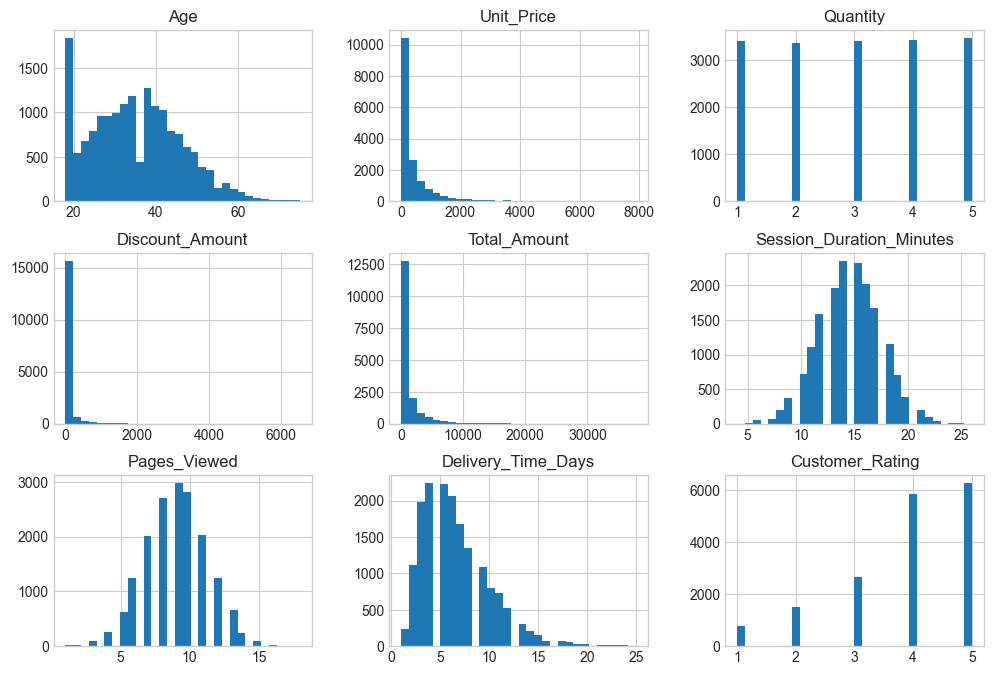

In [7]:
data_sales.hist(figsize=(12, 8), bins=30)

- We don't see any outlier in the dataset

In [8]:
data_sales[data_sales['Order_ID'].duplicated()]

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating


In [9]:
data_sales.duplicated().sum()

np.int64(0)

- There are not duplicated entries in this dataset

### **3.3. Dropping and modifying columns**

In [10]:
# Parsing Date column to datetime format
data_sales['Date'] = pd.to_datetime(data_sales['Date'], format='%Y-%m-%d')
data_sales['Year'] = data_sales['Date'].dt.year
data_sales['Month'] = data_sales['Date'].dt.month
data_sales['Day'] = data_sales['Date'].dt.day

# Dropping original Date and Order_ID columns
data_sales = data_sales.drop(columns=['Date', 'Order_ID']).copy()

data_sales.head()

,Customer_ID,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Day
0,CUST_00001,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4,2023,5,29
1,CUST_00001,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2,2023,10,12
2,CUST_00001,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4,2023,12,5
3,CUST_00002,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4,2023,5,11
4,CUST_00002,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4,2023,6,16


In [11]:
data_sales.tail()

,Customer_ID,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Day
17044,CUST_04999,44,Male,Antalya,Beauty,68.65,2,0.00,137.30,Digital Wallet,Mobile,14,10,False,6,1,2024,1,16
17045,CUST_05000,24,Female,Eskisehir,Beauty,156.12,1,0.00,156.12,Credit Card,Mobile,15,8,True,7,5,2023,2,22
17046,CUST_05000,24,Female,Eskisehir,Home & Garden,1065.24,3,0.00,3195.72,Credit Card,Desktop,17,11,True,5,4,2023,6,29
17047,CUST_05000,24,Female,Eskisehir,Books,47.73,2,8.80,86.66,Credit Card,Desktop,13,11,True,12,2,2023,12,29
17048,CUST_05000,24,Female,Eskisehir,Home & Garden,1015.23,4,217.01,3843.91,Credit Card,Mobile,15,7,True,3,4,2024,1,19


### **3.4. Features Correlation**

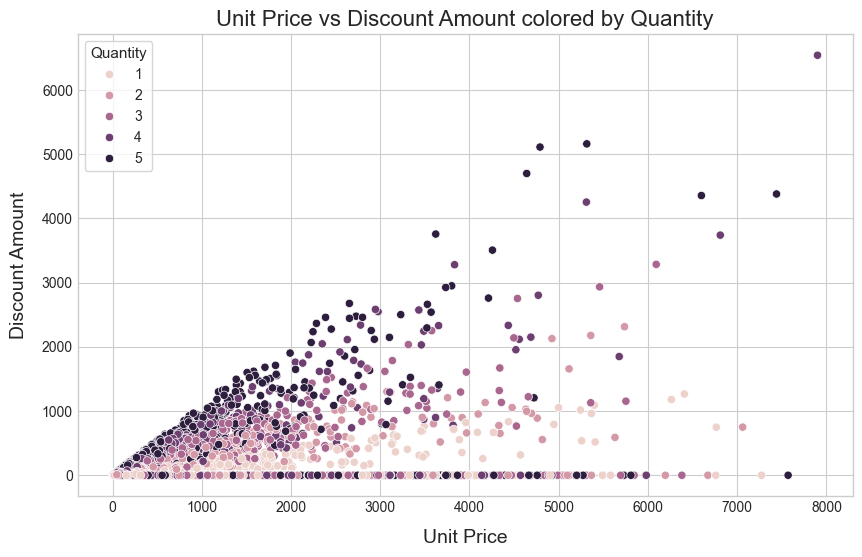

In [12]:
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(data=data_sales, 
                     x='Unit_Price', 
                     y='Discount_Amount',
                     hue='Quantity')

ax.set_title('Unit Price vs Discount Amount colored by Quantity', fontsize=16)
ax.set_xlabel('Unit Price', fontsize=14, labelpad=10)
ax.set_ylabel('Discount Amount', fontsize=14, labelpad=10)
ax.legend(title='Quantity', title_fontsize=11, frameon=True)

plt.show()

- In the graph is shown that for higher discounts, people are buying more instances of the same product

In [13]:
data_sales.columns

Index(['Customer_ID', 'Age', 'Gender', 'City', 'Product_Category',
       'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount',
       'Payment_Method', 'Device_Type', 'Session_Duration_Minutes',
       'Pages_Viewed', 'Is_Returning_Customer', 'Delivery_Time_Days',
       'Customer_Rating', 'Year', 'Month', 'Day'],
      dtype='object')

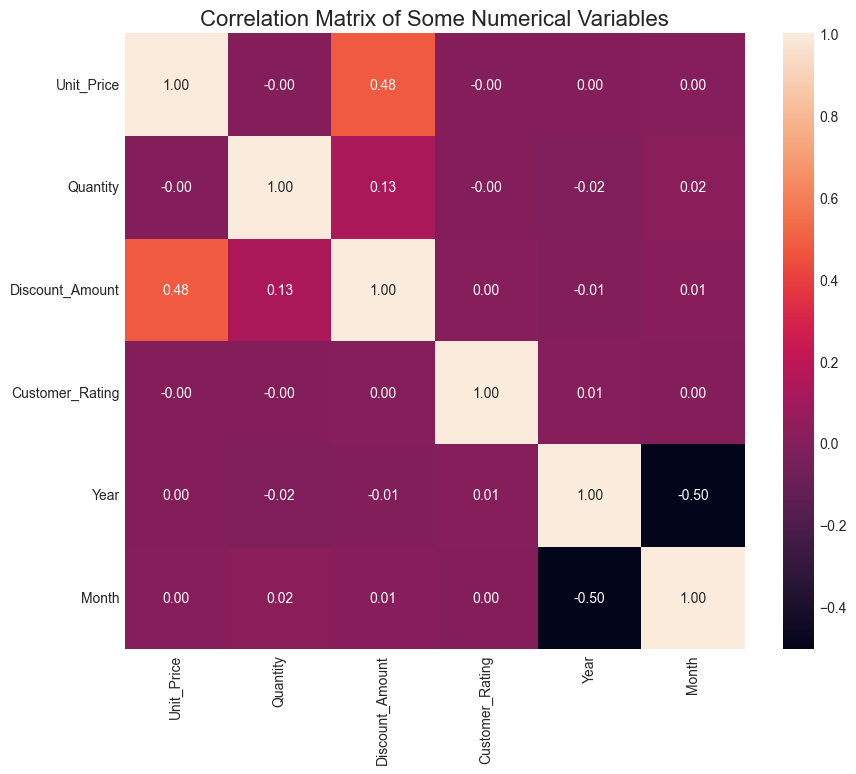

In [14]:
num_variables_corr = ['Unit_Price', 'Quantity', 'Discount_Amount', 'Customer_Rating', 'Year', 'Month']
corr_matrix = data_sales[num_variables_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f")

plt.title('Correlation Matrix of Some Numerical Variables', fontsize=16)
plt.show()

Since we are using a Pearson correlation matrix, the analysis captures linear relationships between numerical variables only. Based on the results, the following insights can be drawn:

- There is a strong positive correlation between Unit Price and Discount Amount, as well as between Discount Amount and Quantity sold, suggesting that higher-priced items tend to receive larger discounts and that discounts are associated with increased sales volume.

- Although the heatmap shows no correlation between Unit Price and Quantity, this does not imply the absence of a relationship. Rather, it indicates that there is no strong linear relationship between these variables.

- The correlation matrix also suggests no significant linear relationship between Discount Amount and Month, indicating that discounts do not follow a consistent seasonal pattern across the year.

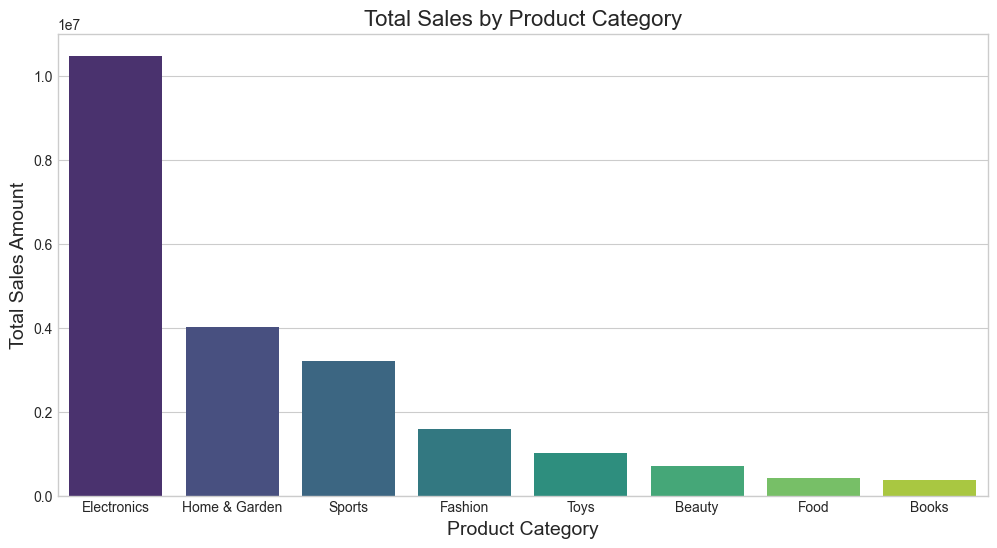

In [15]:
product_total_sales = data_sales.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(
    x=product_total_sales.index,
    y=product_total_sales.values,
    palette='viridis',
    hue=product_total_sales.index,
    legend=False
)

plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.title('Total Sales by Product Category', fontsize=16)
plt.show()

- The graph shows that customers spend the most on electronics, while books account for the lowest total sales.

In [16]:
sales_per_month = data_sales.groupby(['Month', 'Year'])['Total_Amount'].sum().unstack()
sales_per_month

Year,2023,2024
Month,,
1,1311603.21,1490824.78
2,1409777.29,1329884.01
3,1458005.58,1272101.99
4,1499648.03,NaN
5,1483511.61,NaN
6,1380984.94,NaN
7,1560046.14,NaN
8,1510999.75,NaN
9,1502164.37,NaN


- I don't have enough 2024 data to make a proper comparision, I will just analyse the sales time evolution during 2023.

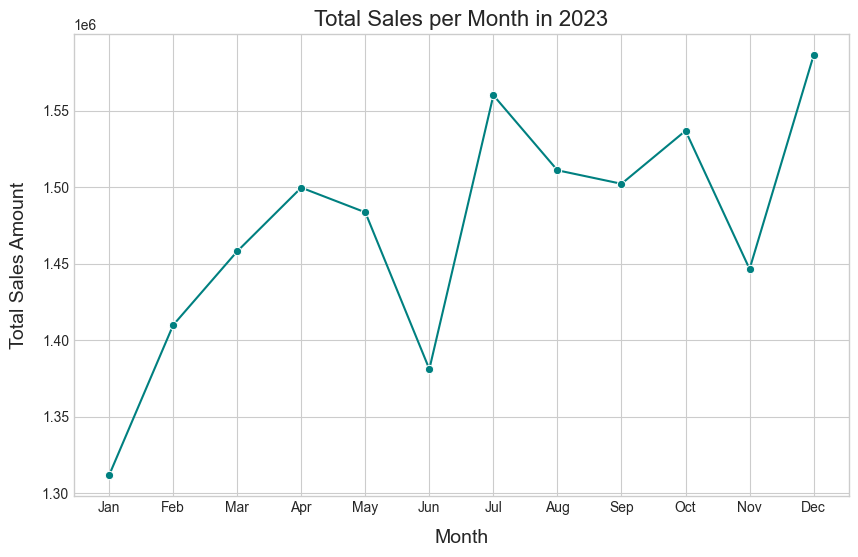

In [17]:
sales_per_month = (
    data_sales
    .query('Year == 2023')
    .groupby('Month')['Total_Amount']
    .sum()
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    x=sales_per_month.index,
    y=sales_per_month.values,
    marker='o', 
    color='teal'
)

x_ticks = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Total Sales Amount', fontsize=14, labelpad=10)
plt.title('Total Sales per Month in 2023', fontsize=16)
plt.xticks(sales_per_month.index, labels=[x_ticks[m] for m in sales_per_month.index])
plt.show()

Insights drawn from the graph:

- Sales reach their highest level in December, which may be driven by holiday-related spending, such as Christmas promotions and gift purchases.

- A sharp decline in January follows the December peak, potentially reflecting post-holiday budget adjustments and reduced consumer spending.

- After the early-year slowdown, sales gradually increase toward the beginning of the summer period, possibly influenced by seasonal demand and vacation-related purchases.

In [18]:
data_sales.head(10)

,Customer_ID,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Day
0,CUST_00001,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4,2023,5,29
1,CUST_00001,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2,2023,10,12
2,CUST_00001,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4,2023,12,5
3,CUST_00002,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4,2023,5,11
4,CUST_00002,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4,2023,6,16
5,CUST_00003,42,Male,Konya,Toys,198.28,2,0.00,396.56,Credit Card,Tablet,10,9,False,6,2,2023,2,27
6,CUST_00003,42,Male,Konya,Home & Garden,526.85,5,0.00,2634.25,Digital Wallet,Desktop,11,8,True,6,5,2024,1,3
7,CUST_00004,53,Male,Izmir,Fashion,96.20,5,97.78,383.22,Credit Card,Desktop,16,15,False,4,5,2024,2,13
8,CUST_00005,32,Male,Ankara,Home & Garden,533.67,3,0.00,1601.01,Bank Transfer,Mobile,12,8,False,5,5,2023,3,16
9,CUST_00005,32,Male,Ankara,Toys,73.06,4,0.00,292.24,Credit Card,Mobile,13,12,True,7,2,2023,6,12


### **3.5. Questions to answer with this dataset**

1- Top cities with the highest comsumption of beauty and fashion product? 

2- Top rated product categories?

3- Most popular payment methods depending on age?

4- Relationship between the amount of days for the delivery and the customer fidelity?

5- Cities with the best delivery systems? 

### **3.5.1. Question 1**

In [19]:
data_sales['City'].value_counts()

City
Istanbul     4402
Ankara       2422
Izmir        2072
Bursa        1721
Adana        1326
Antalya      1246
Gaziantep    1183
Konya        1120
Kayseri       851
Eskisehir     706
Name: count, dtype: int64

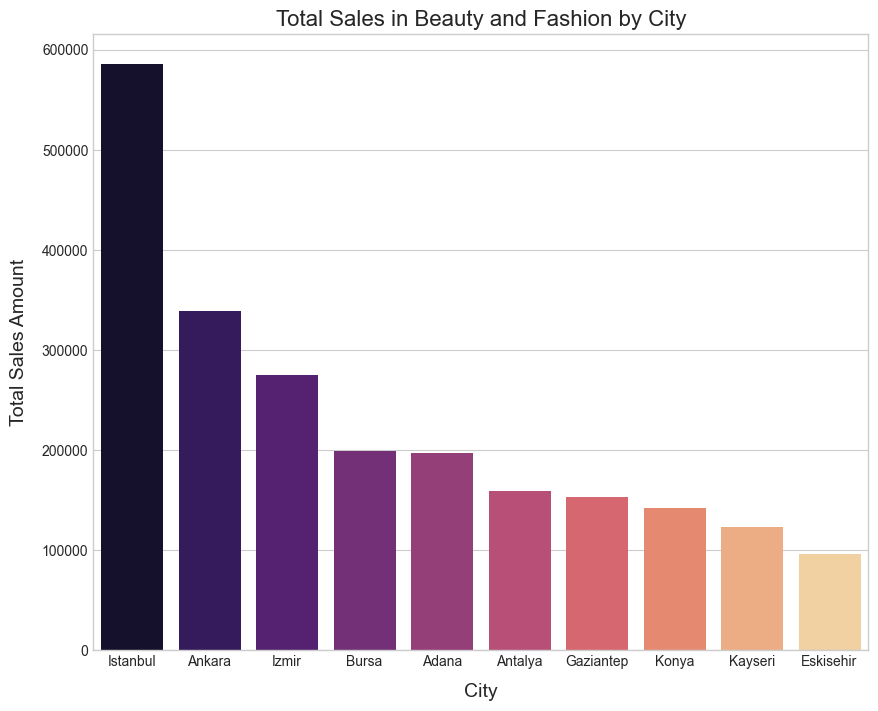

In [30]:
city_beauty_fashion = (data_sales.query('Product_Category == "Beauty" or Product_Category == "Fashion"')
                       .groupby('City')['Total_Amount']
                       .sum()
                       .sort_values(ascending=False)
                       )

plt.figure(figsize=(10, 8))

sns.barplot(
    x=city_beauty_fashion.index,
    y=city_beauty_fashion.values,
    palette='magma',
    hue=city_beauty_fashion.index,
    legend=False
)

plt.xlabel('City', fontsize=14, labelpad=10)
plt.ylabel('Total Sales Amount', fontsize=14, labelpad=10)
plt.title('Total Sales in Beauty and Fashion by City', fontsize=16)
plt.show()

- Istanbul records the highest sales in beauty and fashion, likely influenced by its population size and market scale.

- Although Adana has a smaller population than Antalya and Konya, it exhibits comparatively higher fashion and beauty spending, indicating potential differences in consumer preferences or income distribution.

### **3.5.1. Question 2**

<Axes: xlabel='Unit_Price', ylabel='Discount_Amount'>

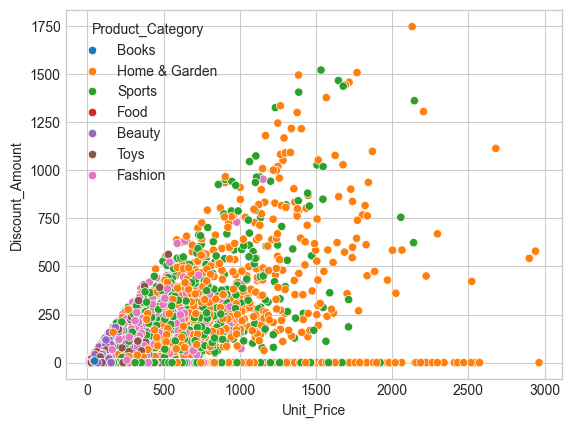

In [46]:
sns.scatterplot(data=data_sales[data_sales['Product_Category'] != 'Electronics'], x='Unit_Price', y='Discount_Amount', hue='Product_Category')

### **3.5.1. Question 3**

In [64]:
# Creating Age_Group column
data_sales['Age_Group'] = data_sales['Age'].apply(lambda x: 'Young Adults' if x < 30 else ('Adults' if x < 60 else 'Senior'))

payment_methods_gender = data_sales.groupby('Age_Group')['Payment_Method'].value_counts(normalize=True).unstack()
payment_methods_gender

Payment_Method,Bank Transfer,Cash on Delivery,Credit Card,Debit Card,Digital Wallet
Age_Group,,,,,
Adults,0.104216,0.052789,0.395239,0.256406,0.191350
Senior,0.113074,0.035336,0.388693,0.279152,0.183746
Young Adults,0.101389,0.051562,0.406424,0.246528,0.194097


<Axes: xlabel='Age_Group'>

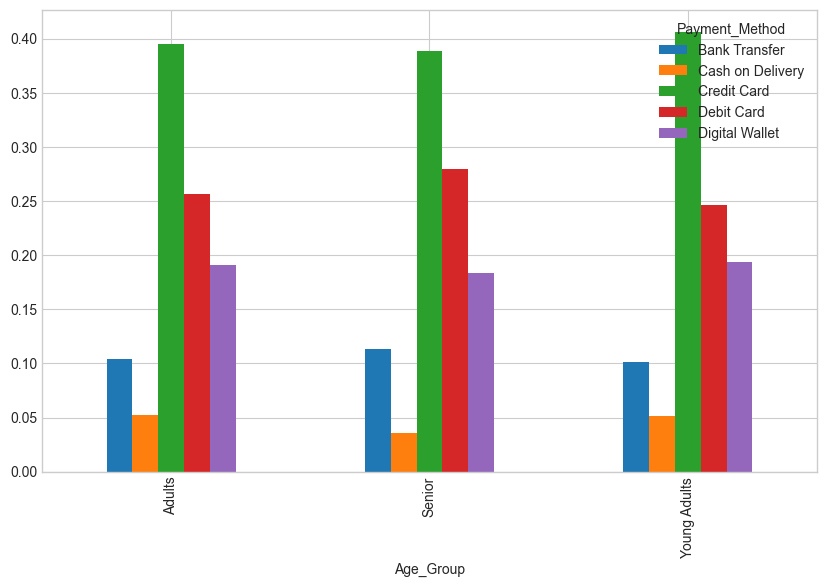

In [65]:
payment_methods_gender.plot(kind='bar', figsize=(10, 6))